# Seaborn

## 1. Introduction

Seaborn est une bibliothèque permettant de créer des graphiques statistiques en Python. Elle est basée sur Matplotlib, et s’intègre avec les structures Pandas.

Cette bibliothèque est aussi performante que Matplotlib, mais apporte une simplicité et des fonctionnalités inédites. Elle permet d’explorer et de comprendre rapidement les données.

Des cadres de données complets peuvent être capturés, et les fonctions internes permettant la cartographie sémantique et l’agrégation statistique permettent de convertir les données en visualisations graphiques.

### 1.1. Importation et nettoyage des données

Pour importer les données à étudier, on utilise la méthode read_csv de Pandas. Le jeu de données est un jeu basé sur 120 ans de résultats aux Jeux Olympimpiques. Il est nécessaire de nettoyer ce jeu : soit on supprime les données manquantes, soit on les remplace par la moyenne.


In [3]:
import pandas as pd 

donnees = pd.read_csv("jeux_de_donnees/120-years-of-olympic-history-athletes-and-results.csv", index_col=[1])

# Création du nouveau dataset sans les lignes contenant les valeurs manquantes
donnees["Medal"] = donnees["Medal"].fillna("None")
donnees_NaN_supprimees = donnees.dropna()
donnees_NaN_supprimees = donnees_NaN_supprimees.drop_duplicates()

# Création du nouveau dataset avec remplacement des variables par la moyenne
moyennes = donnees[["Age", "Height", "Weight"]].mean()
donnees[["Age", "Height", "Weight"]] = donnees[["Age", "Height", "Weight"]].fillna(moyennes)
donnees_NaN_remplacees = donnees.drop_duplicates()


print('Taille du jeu de données où les données manquantes ont été supprimées : ',donnees_NaN_supprimees.shape)
print('Taille du jeu de données avec les données manquantes remplacées par la moyennes : ',donnees_NaN_remplacees.shape)


Taille du jeu de données où les données manquantes ont été supprimées :  (206152, 14)
Taille du jeu de données avec les données manquantes remplacées par la moyennes :  (269731, 14)


La suppression retire donc une grande partie des données. A voir si 200k données nous suffisent, ou si l'on préfère garder un grand volume de données dont une partie a été remplacée par la moyenne (ce que fausse donc en partie les statistiques).

### 1.2. Contexte

Il est possible de dire à Seaborn dans quel contexte les images seront utilisées et, en fonction de ce contexte, elle adaptera la taille des courbes et des axes.

Il existe quatre contextes disponibles avec Seaborn : paper, notebook, talk et poster. paper représente le contexte le plus petit, par exemple pour créer une figure pour une publication scientifique. poster représente le contexte le plus grand, par exemple pour créer une figure à mettre sur un poster scientifique pour présenter ses résultats. notebook est utilisée pour une figure à intégrer dans un notebook, et enfin, talk permet de dire à Seaborn que la figure sera placée dans un fichier PowerPoint pour une présentation orale de ses résultats.

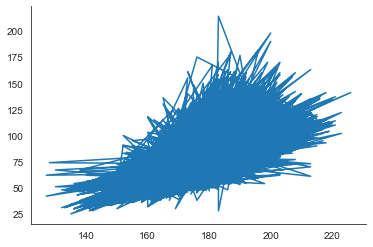

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

plt.figure()
plt.subplot(111)
plt.plot(donnees_NaN_supprimees["Height"], donnees_NaN_supprimees["Weight"])

sns.despine() # .despine permet de supprimer les axes de haut et de droite (top=True, right=True, left=False, bottom=False)
sns.set_context("notebook") # paper, notebook, talk et poser
plt.show()
plt.close()

### 1.3. Palette de couleurs

Il est possible avec Seaborn de choisir une palette de couleur existante, ou de créer sa propre palette.

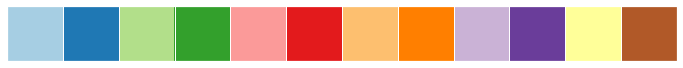

In [16]:
sns.palplot(sns.color_palette("Paired"))

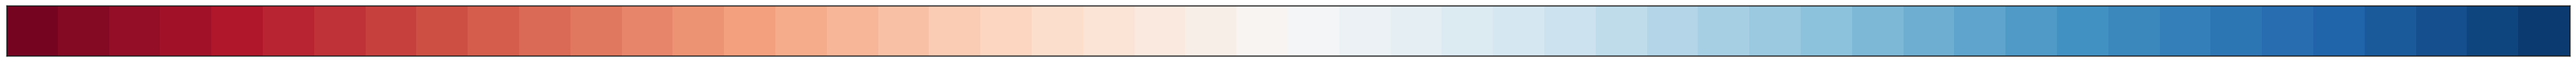

In [7]:
sns.palplot(sns.color_palette("RdBu", 50))

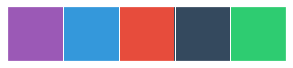

In [20]:
palette = sns.color_palette(["#9b59b6","#3498db","#e74c3c","#34495e","#2ecc71"])
sns.palplot(palette)

sns.set_palette(palette)

## 2. Les différents types de graphiques

### 2.1. Nuages de points : Scatterplot

Il est intéressant ici d'observer la distribution des tailles et des poids des athlètes en fonction de leur sexe et de leur performance.

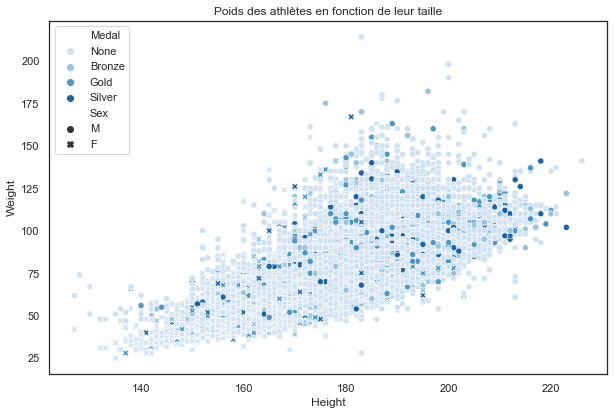

In [14]:
sns.set_style("white")
sns.set_context("notebook")

plt.figure(figsize=(10,6.5))
plt.subplot(111)
sns.scatterplot(
    data=donnees_NaN_supprimees,
    x="Height",
    y="Weight",
    hue="Medal", # Change la couleur en fonction de la valeur de Medal
    style="Sex", # Change la forme du point en fonction de la valeur de Sex
    palette="Blues")

plt.title("Poids des athlètes en fonction de leur taille")
plt.legend(loc="upper left")

plt.show()
plt.close()

### 2.2. Pointplot

On peut avec Seaborn tracer un graphique à point pour suivre l'évolution temporelle du nombre de participants en fonction du sexe.

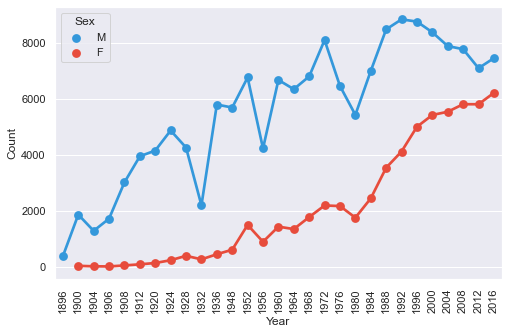

In [38]:
palette = sns.color_palette(["#3498db","#e74c3c"])
sns.set_palette(palette)
sns.set_style("darkgrid")
sns.set_context("notebook")

plt.figure(figsize=(8,5))
plt.subplot(111)

donnees_summer = donnees_NaN_remplacees[donnees_NaN_remplacees["Season"]=="Summer"]
donnees_pointplot = donnees_summer.groupby(["Year","Sex"]).size().reset_index(name="Count")

sns.pointplot(data=donnees_pointplot, x="Year", y="Count", hue="Sex")
plt.xticks(rotation=90)
plt.show()

On constate que le nombre d’athlètes masculins a toujours été supérieur au nombre d’athlètes féminins, mais que depuis 2012, cette différence est beaucoup moins marquée.

Ensuite, on constate chez les athlètes masculins trois années avec une très forte baisse de participation : 1932, 1956 et 1980. Par exemple, en cherchant un peu sur Google, l’année 1932 correspond à la Grande Dépression et les nations européennes ont eu du mal à financer les voyages des athlètes aux États-Unis, où se déroulaient les JO, d’où la forte baisse de participation. En 1956 et 1980, suite à des contextes politiques très lourds, plusieurs pays ont boycotté les JO.

De plus on remarque que les JO sont bien séparés de quatre années, sauf entre 1912-1920 et 1936-1948, qui correspondent respectivement à la Première puis à la Deuxième Guerre mondiale, durant lesquelles les JO n’ont pas eu lieu.

### 2.3. Stripplot

Permet de tracer un  nuage de point avec une variable catégorielle, ici l'année.

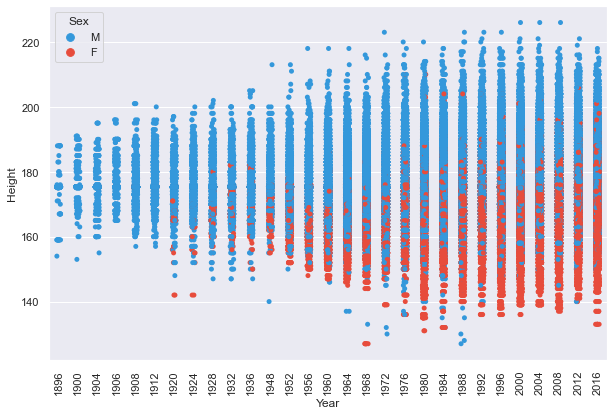

In [39]:
sns.set_style("darkgrid")
sns.set_context("notebook")

plt.figure(figsize=(10,6.5))
plt.subplot(111)

sns.stripplot(data=donnees_summer, x="Year", y="Height", hue="Sex")
plt.xticks(rotation=90)

plt.show()
plt.close()

Ici on peut voir que les athlètes sélectionnés, hommes ou femmes, ont tendances à être plus grands d'années en années.

On remarque aussi que le nombre de participantes augmente depuis les années 30.

### 2.6 Boxplots

Un boxplot (ou diagramme boîte à moustaches) montre la distribution des données quantitatives d'une manière qui facilite les comparaisons entre les variables ou entre les niveaux d'une variable catégorielle. La boîte montre les quartiles de l'ensemble de données tandis que les moustaches s'étendent pour montrer le reste de la distribution, à l'exception des points qui sont déterminés comme étant des « valeurs aberrantes » à l'aide d'une méthode qui est fonction de l'intervalle interquartile.

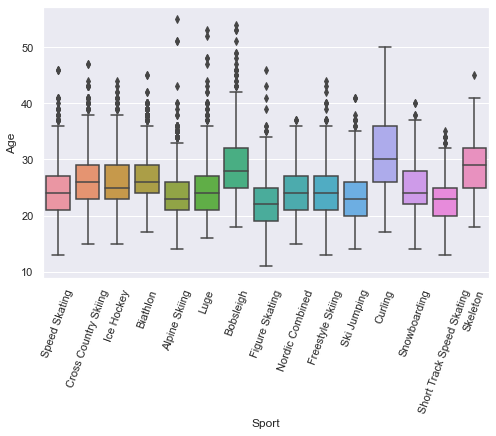

In [36]:
donnee_winter = donnees_NaN_supprimees[donnees_NaN_supprimees["Season"]=="Winter"]

sns.set_style("darkgrid")
sns.set_context("notebook")

plt.figure(figsize=(8,5))
plt.subplot(111)

sns.boxplot(data=donnee_winter, x="Sport", y="Age")
plt.xticks(rotation=70)

plt.show()
plt.close()

Ici on remarque que l'âge moyen des athlètes varie grandement en fonctioj de la discipline. Au curling, l'âge moyen est de 30 ans, tandis qu'il est d'environ 23 ans au patinage artistique.

### 2.6 Histogramme

Pour étudier la distribution d'une variable qualitative continue comme le poids et la taille, on utilise un histogramme.

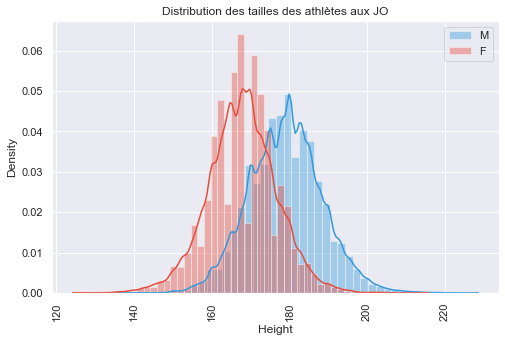

In [32]:
val_athletes_m = donnees_NaN_supprimees.loc[donnees_NaN_supprimees["Sex"]=="M"] 
val_athletes_f = donnees_NaN_supprimees.loc[donnees_NaN_supprimees["Sex"]=="F"]

palette = sns.color_palette(["#3498db","#e74c3c"])
sns.set_palette(palette)
sns.set_style("darkgrid")
sns.set_context("notebook")

plt.figure(figsize=(8,5))
plt.subplot(111)

sns.distplot(val_athletes_m["Height"], kde=True, bins=50, label="M")
sns.distplot(val_athletes_f["Height"], kde=True, bins=50, label="F")

plt.title("Distribution des tailles des athlètes aux JO")
plt.xticks(rotation=90)
plt.legend()
plt.show()
plt.close()

### 2.7 Jointplot

Permet de comparer deux variables quantitatives, sous forme de nuage de points, avec des histogrammes de chaque variable au niveau des axes (ou courbe de densité dans le cas d'une variable continue).

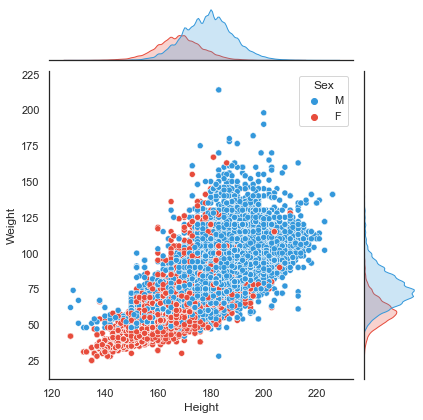

In [41]:
palette = sns.color_palette(["#3498db","#e74c3c"])
sns.set_palette(palette)
sns.set_style("white")
sns.set_context("notebook")

sns.jointplot(data=donnees_NaN_supprimees, x="Height", y ="Weight", hue="Sex")

plt.show()
plt.close()